In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv("train_E6oV3lV.csv",encoding='GB18030')

In [52]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [53]:
len(df[df['label']==1])

2242

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


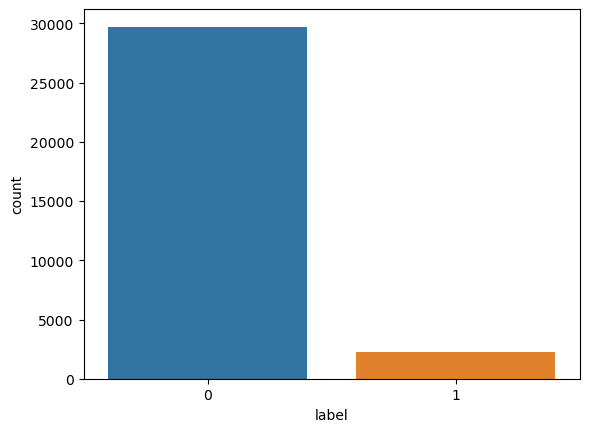

In [54]:
sns.countplot(df['label']);

In [55]:
#!pip install contractions
import contractions

In [56]:
#removing contractions(don't = do not)

df['no_contract']=df['tweet'].apply(lambda x:[contractions.fix(word) for word in x.split()])

df['no_contract']=[' '.join(map(str,l)) for l in df['no_contract']]
df.head()

,id,label,tweet,no_contract
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i cannot u...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love you take with you all the time i...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [57]:
df.tail()

,id,label,tweet,no_contract
31957,31958,0,ate @user isz that youuu?冒聼聵聧冒聼聵聧冒聼聵聧冒聼聵聧冒聼聵聧冒...,ate @user isz that youuu?冒聼聵聧冒聼聵聧冒聼聵聧冒聼聵聧冒聼聵聧冒...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow,thank you @user for you follow


In [58]:
#tokenizing the tweets

from nltk.tokenize import word_tokenize

df['tokenized']=df['no_contract'].apply(word_tokenize)

df.head()

,id,label,tweet,no_contract,tokenized
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is so...,"[@, user, when, a, father, is, dysfunctional, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i cannot u...,"[@, user, @, user, thanks, for, #, lyft, credi..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,#model i love you take with you all the time i...,"[#, model, i, love, you, take, with, you, all,..."
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]"


In [59]:
#converting to lower case

df['lower']=df['tokenized'].apply(lambda x:[word.lower() for word in x if word!='user'])

df.head()

,id,label,tweet,no_contract,tokenized,lower
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is so...,"[@, user, when, a, father, is, dysfunctional, ...","[@, when, a, father, is, dysfunctional, and, i..."
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i cannot u...,"[@, user, @, user, thanks, for, #, lyft, credi...","[@, @, thanks, for, #, lyft, credit, i, can, n..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,#model i love you take with you all the time i...,"[#, model, i, love, you, take, with, you, all,...","[#, model, i, love, you, take, with, you, all,..."
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]","[factsguide, :, society, now, #, motivation]"


In [60]:
#removing punctuations

import string

punc = string.punctuation
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word not in punc])

df.head()

,id,label,tweet,no_contract,tokenized,lower,no_punc
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is so...,"[@, user, when, a, father, is, dysfunctional, ...","[@, when, a, father, is, dysfunctional, and, i...","[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i cannot u...,"[@, user, @, user, thanks, for, #, lyft, credi...","[@, @, thanks, for, #, lyft, credit, i, can, n...","[thanks, for, lyft, credit, i, can, not, use, ..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesty]","[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,#model i love you take with you all the time i...,"[#, model, i, love, you, take, with, you, all,...","[#, model, i, love, you, take, with, you, all,...","[model, i, love, you, take, with, you, all, th..."
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]","[factsguide, :, society, now, #, motivation]","[factsguide, society, now, motivation]"


In [61]:
#removing digits and non-english letters

alphabet = list(string.ascii_lowercase)
nums=[str(i) for i in range(10)]

cleaned=[]

for tweet in df['no_punc']:
    tw=[]
    for word in tweet:
        wo=''
        for letter in word:
            if letter not in nums and letter in alphabet:
                wo+=letter
        tw.append(wo)
    cleaned.append(tw)

df['cleaned']=cleaned

In [62]:
df.tail()

,id,label,tweet,no_contract,tokenized,lower,no_punc,cleaned
31957,31958,0,ate @user isz that youuu?冒聼聵聧冒聼聵聧冒聼聵聧冒聼聵聧冒聼聵聧冒...,ate @user isz that youuu?冒聼聵聧冒聼聵聧冒聼聵聧冒聼聵聧冒聼聵聧冒...,"[ate, @, user, isz, that, youuu, ?, 冒聼聵聧冒聼聵聧冒聼...","[ate, @, isz, that, youuu, ?, 冒聼聵聧冒聼聵聧冒聼聵聧冒聼聵聧...","[ate, isz, that, youuu, 冒聼聵聧冒聼聵聧冒聼聵聧冒聼聵聧冒聼聵聧冒聼...","[ate, isz, that, youuu, ]"
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...,"[to, see, nina, turner, on, the, airwaves, try...","[to, see, nina, turner, on, the, airwaves, try...","[to, see, nina, turner, on, the, airwaves, try...","[to, see, nina, turner, on, the, airwaves, try..."
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,"[listening, to, sad, songs, on, a, monday, mor...","[listening, to, sad, songs, on, a, monday, mor...","[listening, to, sad, songs, on, a, monday, mor...","[listening, to, sad, songs, on, a, monday, mor..."
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","@user #sikh #temple vandalised in in #calgary,...","[@, user, #, sikh, #, temple, vandalised, in, ...","[@, #, sikh, #, temple, vandalised, in, in, #,...","[sikh, temple, vandalised, in, in, calgary, ws...","[sikh, temple, vandalised, in, in, calgary, ws..."
31961,31962,0,thank you @user for you follow,thank you @user for you follow,"[thank, you, @, user, for, you, follow]","[thank, you, @, for, you, follow]","[thank, you, for, you, follow]","[thank, you, for, you, follow]"


In [63]:
#!pip install pyspellchecker
from spellchecker import SpellChecker

In [64]:
spell=SpellChecker()

In [65]:
#df['spell_check']=df['cleaned'].apply(lambda x: [spell.correction(word) for word in x])

In [66]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [67]:
#removing stop words

df['stop_words']=df['cleaned'].apply(lambda x:[word for word in x if word not in stop_words and word!=" "])

df.head()

,id,label,tweet,no_contract,tokenized,lower,no_punc,cleaned,stop_words
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is so...,"[@, user, when, a, father, is, dysfunctional, ...","[@, when, a, father, is, dysfunctional, and, i...","[when, a, father, is, dysfunctional, and, is, ...","[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i cannot u...,"[@, user, @, user, thanks, for, #, lyft, credi...","[@, @, thanks, for, #, lyft, credit, i, can, n...","[thanks, for, lyft, credit, i, can, not, use, ...","[thanks, for, lyft, credit, i, can, not, use, ...","[thanks, lyft, credit, use, offer, wheelchair,..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesty]","[bihday, your, majesty]","[bihday, your, majesty]","[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,#model i love you take with you all the time i...,"[#, model, i, love, you, take, with, you, all,...","[#, model, i, love, you, take, with, you, all,...","[model, i, love, you, take, with, you, all, th...","[model, i, love, you, take, with, you, all, th...","[model, love, take, time, ]"
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]","[factsguide, :, society, now, #, motivation]","[factsguide, society, now, motivation]","[factsguide, society, now, motivation]","[factsguide, society, motivation]"


In [68]:
#parts of speech tagging
from nltk import pos_tag

df['pos_tags']=df['stop_words'].apply(nltk.tag.pos_tag)

In [69]:
df.head()

,id,label,tweet,no_contract,tokenized,lower,no_punc,cleaned,stop_words,pos_tags
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is so...,"[@, user, when, a, father, is, dysfunctional, ...","[@, when, a, father, is, dysfunctional, and, i...","[when, a, father, is, dysfunctional, and, is, ...","[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ...","[(father, RBR), (dysfunctional, JJ), (selfish,..."
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i cannot u...,"[@, user, @, user, thanks, for, #, lyft, credi...","[@, @, thanks, for, #, lyft, credit, i, can, n...","[thanks, for, lyft, credit, i, can, not, use, ...","[thanks, for, lyft, credit, i, can, not, use, ...","[thanks, lyft, credit, use, offer, wheelchair,...","[(thanks, NNS), (lyft, VBP), (credit, NN), (us..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesty]","[bihday, your, majesty]","[bihday, your, majesty]","[bihday, majesty]","[(bihday, NN), (majesty, NN)]"
3,4,0,#model i love u take with u all the time in ...,#model i love you take with you all the time i...,"[#, model, i, love, you, take, with, you, all,...","[#, model, i, love, you, take, with, you, all,...","[model, i, love, you, take, with, you, all, th...","[model, i, love, you, take, with, you, all, th...","[model, love, take, time, ]","[(model, NN), (love, VB), (take, NN), (time, N..."
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]","[factsguide, :, society, now, #, motivation]","[factsguide, society, now, motivation]","[factsguide, society, now, motivation]","[factsguide, society, motivation]","[(factsguide, RB), (society, NN), (motivation,..."


In [70]:
from nltk.corpus import wordnet

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [71]:
#converting to wordnet POS tags

df['wordnet_tags']=df['pos_tags'].apply(lambda x: [(pair[0],get_wordnet_pos(pair[1])) for pair in x])

In [72]:
df.head()

,id,label,tweet,no_contract,tokenized,lower,no_punc,cleaned,stop_words,pos_tags,wordnet_tags
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is so...,"[@, user, when, a, father, is, dysfunctional, ...","[@, when, a, father, is, dysfunctional, and, i...","[when, a, father, is, dysfunctional, and, is, ...","[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ...","[(father, RBR), (dysfunctional, JJ), (selfish,...","[(father, r), (dysfunctional, a), (selfish, a)..."
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i cannot u...,"[@, user, @, user, thanks, for, #, lyft, credi...","[@, @, thanks, for, #, lyft, credit, i, can, n...","[thanks, for, lyft, credit, i, can, not, use, ...","[thanks, for, lyft, credit, i, can, not, use, ...","[thanks, lyft, credit, use, offer, wheelchair,...","[(thanks, NNS), (lyft, VBP), (credit, NN), (us...","[(thanks, n), (lyft, v), (credit, n), (use, n)..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesty]","[bihday, your, majesty]","[bihday, your, majesty]","[bihday, majesty]","[(bihday, NN), (majesty, NN)]","[(bihday, n), (majesty, n)]"
3,4,0,#model i love u take with u all the time in ...,#model i love you take with you all the time i...,"[#, model, i, love, you, take, with, you, all,...","[#, model, i, love, you, take, with, you, all,...","[model, i, love, you, take, with, you, all, th...","[model, i, love, you, take, with, you, all, th...","[model, love, take, time, ]","[(model, NN), (love, VB), (take, NN), (time, N...","[(model, n), (love, v), (take, n), (time, n), ..."
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]","[factsguide, :, society, now, #, motivation]","[factsguide, society, now, motivation]","[factsguide, society, now, motivation]","[factsguide, society, motivation]","[(factsguide, RB), (society, NN), (motivation,...","[(factsguide, r), (society, n), (motivation, n)]"


In [73]:
from nltk.stem import WordNetLemmatizer

In [74]:
#lemmatizing the tweets

wnl=WordNetLemmatizer()

df['lemmatized']=df['wordnet_tags'].apply(lambda x:[wnl.lemmatize(word,pos_tag) for (word,pos_tag) in x])

df.head()

,id,label,tweet,no_contract,tokenized,lower,no_punc,cleaned,stop_words,pos_tags,wordnet_tags,lemmatized
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is so...,"[@, user, when, a, father, is, dysfunctional, ...","[@, when, a, father, is, dysfunctional, and, i...","[when, a, father, is, dysfunctional, and, is, ...","[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ...","[(father, RBR), (dysfunctional, JJ), (selfish,...","[(father, r), (dysfunctional, a), (selfish, a)...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i cannot u...,"[@, user, @, user, thanks, for, #, lyft, credi...","[@, @, thanks, for, #, lyft, credit, i, can, n...","[thanks, for, lyft, credit, i, can, not, use, ...","[thanks, for, lyft, credit, i, can, not, use, ...","[thanks, lyft, credit, use, offer, wheelchair,...","[(thanks, NNS), (lyft, VBP), (credit, NN), (us...","[(thanks, n), (lyft, v), (credit, n), (use, n)...","[thanks, lyft, credit, use, offer, wheelchair,..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesty]","[bihday, your, majesty]","[bihday, your, majesty]","[bihday, majesty]","[(bihday, NN), (majesty, NN)]","[(bihday, n), (majesty, n)]","[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,#model i love you take with you all the time i...,"[#, model, i, love, you, take, with, you, all,...","[#, model, i, love, you, take, with, you, all,...","[model, i, love, you, take, with, you, all, th...","[model, i, love, you, take, with, you, all, th...","[model, love, take, time, ]","[(model, NN), (love, VB), (take, NN), (time, N...","[(model, n), (love, v), (take, n), (time, n), ...","[model, love, take, time, ]"
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]","[factsguide, :, society, now, #, motivation]","[factsguide, society, now, motivation]","[factsguide, society, now, motivation]","[factsguide, society, motivation]","[(factsguide, RB), (society, NN), (motivation,...","[(factsguide, r), (society, n), (motivation, n)]","[factsguide, society, motivation]"


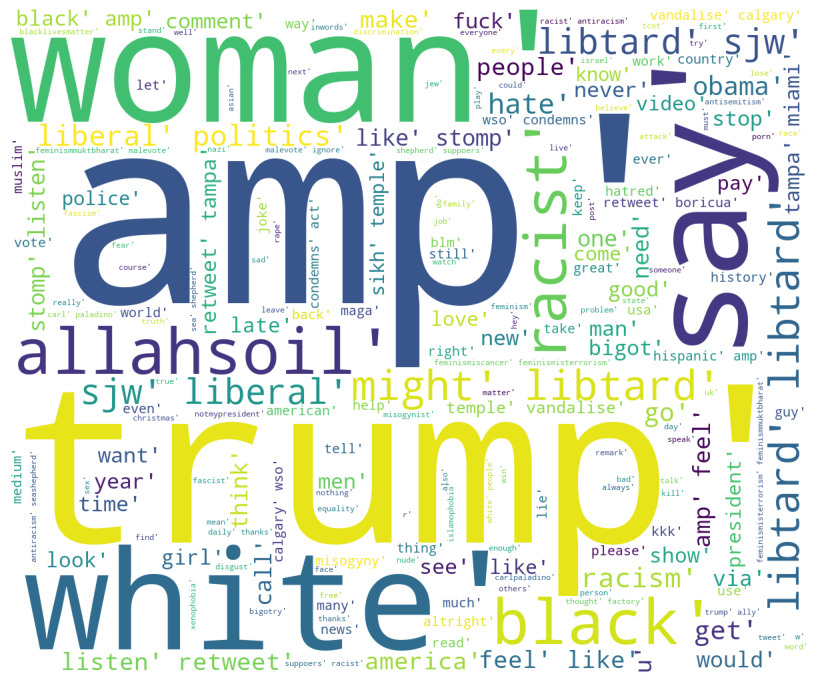

In [75]:
#!pip install wordcloud 
from wordcloud import WordCloud

offensive_words=[word for tweet in df['lemmatized'][df['label']==1] for word in tweet]

wordcloud = WordCloud(width = 1200, height = 1000,
                background_color ='white',
                min_font_size = 10).generate(str(offensive_words))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [76]:
def listToString(s):
 
    # initialize an empty string
    str1 = ""
 
    # traverse in the string
    for ele in s:
        str1 += ele
        str1+=" "
 
    # return string
    return str1

x=[listToString(s) for s in df['lemmatized']]

In [80]:
x
y=df['label']

In [118]:
y=df['label']

from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_vectorizer=count.fit_transform(x)

import xgboost as xgb
xgb_model=xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=9,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='logloss' )

xgb_model_vectorizer = xgb_model.fit(x_vectorizer, y)

In [125]:
def pre(df):

    df['no_contract']=df['tweet'].apply(lambda x:[contractions.fix(word) for word in x.split()])
    df['no_contract']=[' '.join(map(str,l)) for l in df['no_contract']]
    
    df['tokenized']=df['no_contract'].apply(word_tokenize)
    
    df['lower']=df['tokenized'].apply(lambda x:[word.lower() for word in x if word!='user'])
    
    punc = string.punctuation
    df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word not in punc])
        
    alphabet = list(string.ascii_lowercase)
    nums=[str(i) for i in range(10)]

    cleaned=[]

    for tweet in df['no_punc']:
        tw=[]
        for word in tweet:
            wo=''
            for letter in word:
                if letter not in nums and letter in alphabet:
                    wo+=letter
            tw.append(wo)
        cleaned.append(tw)

    df['cleaned']=cleaned
    
    df['stop_words']=df['cleaned'].apply(lambda x:[word for word in x if word not in stop_words and word!=" "])
    
    df['pos_tags']=df['stop_words'].apply(nltk.tag.pos_tag)
    
    df['wordnet_tags']=df['pos_tags'].apply(lambda x: [(pair[0],get_wordnet_pos(pair[1])) for pair in x])
    
    wnl=WordNetLemmatizer()

    df['lemmatized']=df['wordnet_tags'].apply(lambda x:[wnl.lemmatize(word,pos_tag) for (word,pos_tag) in x])
    
    x=[listToString(s) for s in df['lemmatized']]

    return x
    
    
    


In [126]:
test_df=pd.read_csv("test_tweets_anuFYb8.csv",encoding='GB18030')

In [127]:
x_test=pre(test_df)

In [133]:
x_test=count.transform(test_df['tweet'])

predict=xgb_model_vectorizer.predict(x_test)

In [136]:
pred=pd.DataFrame(test_df['id'])
pred['label']=predict
pred.to_csv('pred.csv',index=False)